In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation ='relu'),
    Dense(16, activation ='relu'),
    Dense(32, activation = 'softmax')
    
])


In [4]:
# Print the model summary
model.weights
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
Total params: 13,376
Trainable params: 13,376
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model
model1 = Sequential([
    Conv2D(16, kernel_size=3, activation = 'relu', input_shape=(28,28,1)),  
    MaxPooling2D(pool_size = 3),
    Flatten(),
#     Dense(64, activation='relu'),
    Dense(10, activation='softmax')   
]) 


#Finding output size at each layer
# no. of filters = 16
# 1.Convolutional layer

# # Image_shape(n) + 2*Pading - filter_size(f) + Default_stride(1)
#  32 + 0 -3 +1 = (None,30,30,16) -- without padding
# with padding 32 + 2 -3 + 1 = 32 shape-(None, 32,32, 16)
    
# 2. MaxPool Layer : filter sizze =(3,3)
#  30/3 =(None,10,10,16)

#  3.Flatten Layer:
#     10*10*16 = (None,1600)
#  4. Dense Layer:
#     shape = no. of input units (None,64)
#  5. Dense Layer:
#     Shape = no. of input units (None, 10)
    

In [7]:
# Print the model summary

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


The default values of the weights and biases in TensorFlow depend on the type of layers we are using. 

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser. 

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$

and  𝑛𝑖𝑛𝑝𝑢𝑡  and  𝑛𝑜𝑢𝑡𝑝𝑢𝑡  are the number of inputs to, and outputs from the layer respectively.


### Initialising your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
# model1.compile(Optimizer='sgd', loss= 'binary_crossentropy', metrics=['accuracy'])


# model1.compile(
#     optimizer= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov = True),
#     loss= tf.keras.losses.BinaryCrossentropy(),
#     metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.7), tf.keras.metrics.MeanAbsoluteError()]
# )
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model1.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics= [acc, mae])

In [9]:
# Print the resulting model attributes

print(model1.loss)
print(model1.optimizer)  # model1.optimizer.lr
print(model1.metrics)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f2be058eb70>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f2be052f320>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images= train_images/255.
test_images = test_images/255.

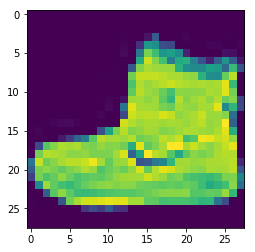

label: Ankle boot


In [15]:
# Display one of the images
i=0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [16]:
# Fit the model

history = model1.fit(train_images[...,np.newaxis],train_labels, epochs =8, batch_size=256)



Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 54s 898us/sample - loss: 0.5412 - sparse_categorical_accuracy: 0.8161 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 51s 853us/sample - loss: 0.3610 - sparse_categorical_accuracy: 0.8701 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 51s 852us/sample - loss: 0.3278 - sparse_categorical_accuracy: 0.8824 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 [==============================] - 51s 847us/sample - loss: 0.3098 - sparse_categorical_accuracy: 0.8895 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 [==============================] - 51s 850us/sample - loss: 0.2992 - sparse_categorical_accuracy: 0.8925 - mean_absolute_error: 4.4200 - loss: 0.2988 - sparse_categorical_accuracy: 0.8925 - mean_absolute_error: 4.
Epoch 6/8
60000/60000 [==============================] - 50s 840us/sample - loss: 0.2876 - sparse_categorical_acc

#### Plot training history

In [17]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.541215,0.816117,4.420000
1,0.361006,0.870133,4.420000
2,0.327812,0.882367,4.419999
3,0.309770,0.889483,4.420000
4,0.299188,0.892533,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

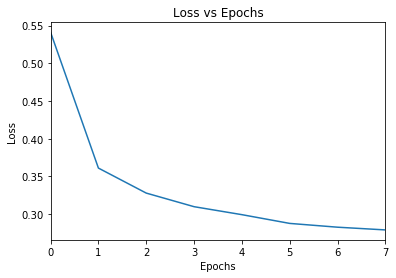

In [18]:
# Make a plot for the loss
loss_plot = df.plot(y = "loss", title= "Loss vs Epochs", legend = False)
loss_plot.set(xlabel = "Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

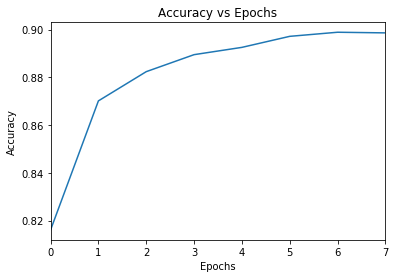

In [19]:
# Make a plot for the accuracy
acc_plot = df.plot(y= "sparse_categorical_accuracy", title= "Accuracy vs Epochs", legend= False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")


[Text(0, 0.5, 'Metric'), Text(0.5, 0, 'Epochs')]

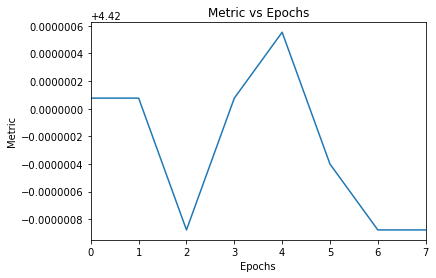

In [20]:
# Make a plot for the additional metric
metric_plot = df.plot(y = "mean_absolute_error", title= "Metric vs Epochs", legend= False)
metric_plot.set(xlabel="Epochs", ylabel= "Metric")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [22]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model1.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 6s - loss: 0.3114 - sparse_categorical_accuracy: 0.8906 - mean_absolute_error: 4.4200


#### Make predictions from the model

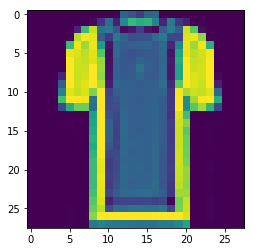

Label: T-shirt/top


In [23]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
# inx = 30
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [24]:
# Get the model predictions
model1.predict(test_image[np.newaxis,...,np.newaxis])
# predictions = model1.predict(test_image[np.newaxis,...,np.newaxis])
# print(f"Model prediction:{labels[np.argmax(predictions)]}")

array([[6.0252434e-01, 2.8484051e-08, 1.0868071e-02, 5.1490483e-03,
        1.9738296e-07, 5.5889467e-13, 3.8145807e-01, 7.1762524e-17,
        2.4351260e-07, 6.7894529e-14]], dtype=float32)